In [45]:
import torch
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import torch.optim as optim

In [2]:
#where t_c is out known temps in C, t_u are our uknown values
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [5]:
#Linear model
def model(t_u , w, b):
    '''
    Input:
        t_u: tensor of unknown temperatures
        w: weights
        b: y-intercept
    Output:
        yPred: y predicted values
    '''
    return w* t_u + b

In [6]:
#define squared loss function
def loss_fn(t_p, t_c):
    '''
    Input:
        t_p: temperature predicted values (yPred)
        t_c: known temp values in Celcius
    Output:
        loss: Squared error
    '''
    loss = (t_p - t_c)**2
    return loss.mean()

In [7]:
#init w and b
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p



tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
#check loss 
loss = loss_fn(t_p,t_c)
loss

tensor(1763.8846)

In [9]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}, z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1]), z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [11]:
#Implement gradient descent on b and w
# In[8]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [12]:
# In[9]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [13]:
# In[10]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [16]:
#compute derivative of loss with respect to w
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c ) / t_p.size(0)
    return dsq_diffs

In [17]:
#compute derivative of model
def dmodel_dw(t_u, w, b):
    return t_u

In [18]:
def dmodel_db(t_u,w,b):
    return 1.0

In [19]:
#define gradient function
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [21]:
# Define trainging loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [22]:
#Here the loss increases to infinity and this is because the the large steprate or learning rate
#is too large and leads to divergence
#With a snaller learning rate the algo should converge

training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

Epoch 1, Loss 1763.884644
Epoch 2, Loss 5802485.500000
Epoch 3, Loss 19408035840.000000
Epoch 4, Loss 64915909902336.000000
Epoch 5, Loss 217130559820791808.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183992928415200051200.000000
Epoch 8, Loss 8125126681682403942989824000.000000
Epoch 9, Loss 27176891792249147543971428302848.000000
Epoch 10, Loss 90901154706620645225508955521810432.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [23]:
#smaller step rate
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

Epoch 1, Loss 1763.884644
Epoch 2, Loss 323.090546
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540285
Epoch 6, Loss 29.351152
Epoch 7, Loss 29.148882
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105242
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102297
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100470
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097715
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095884
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092213
Epoch 25, Loss 29.091297
Epoch 26, Loss 29.090382
Epoch 27, Loss 29.089460
Epoch 28, Loss 29.088549
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086718
Epoch 31, Loss 29.085808
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083965
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081219
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079393
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077559
Epoch 

tensor([ 0.2327, -0.0438])

In [26]:
t_un = 0.1 * t_u

In [27]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816954
Epoch 25, Loss 27.732460
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [33]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)
    #print_params = False)

params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816954
Epoch 25, Loss 27.732460
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 542, Loss 7.203666
Epoch 543, Loss 7.189151
Epoch 544, Loss 7.174683
Epoch 545, Loss 7.160267
Epoch 546, Loss 7.145897
Epoch 547, Loss 7.131578
Epoch 548, Loss 7.117305
Epoch 549, Loss 7.103083
Epoch 550, Loss 7.088911
Epoch 551, Loss 7.074785
Epoch 552, Loss 7.060707
Epoch 553, Loss 7.046677
Epoch 554, Loss 7.032695
Epoch 555, Loss 7.018756
Epoch 556, Loss 7.004869
Epoch 557, Loss 6.991029
Epoch 558, Loss 6.977232
Epoch 559, Loss 6.963488
Epoch 560, Loss 6.949786
Epoch 561, Loss 6.936135
Epoch 562, Loss 6.922528
Epoch 563, Loss 6.908967
Epoch 564, Loss 6.895452
Epoch 565, Loss 6.881980
Epoch 566, Loss 6.868558
Epoch 567, Loss 6.855180
Epoch 568, Loss 6.841848
Epoch 569, Loss 6.828561
Epoch 570, Loss 6.815319
Epoch 571, Loss 6.802118
Epoch 572, Loss 6.788968
Epoch 573, Loss 6.775864
Epoch 574, Loss 6.762798
Epoch 575, Loss 6.749779
Epoch 576, Loss 6.736803
Epoch 577, Loss 6.723875
Epoch 578, Loss 6.710986
Epoch 579, Loss 6.698142
Epoch 580, Loss 6.685344
Epoch 581, Loss 6.672589


Epoch 1155, Loss 3.459477
Epoch 1156, Loss 3.457672
Epoch 1157, Loss 3.455873
Epoch 1158, Loss 3.454080
Epoch 1159, Loss 3.452293
Epoch 1160, Loss 3.450512
Epoch 1161, Loss 3.448736
Epoch 1162, Loss 3.446968
Epoch 1163, Loss 3.445203
Epoch 1164, Loss 3.443449
Epoch 1165, Loss 3.441696
Epoch 1166, Loss 3.439952
Epoch 1167, Loss 3.438210
Epoch 1168, Loss 3.436478
Epoch 1169, Loss 3.434753
Epoch 1170, Loss 3.433029
Epoch 1171, Loss 3.431314
Epoch 1172, Loss 3.429608
Epoch 1173, Loss 3.427903
Epoch 1174, Loss 3.426204
Epoch 1175, Loss 3.424509
Epoch 1176, Loss 3.422824
Epoch 1177, Loss 3.421144
Epoch 1178, Loss 3.419468
Epoch 1179, Loss 3.417798
Epoch 1180, Loss 3.416134
Epoch 1181, Loss 3.414477
Epoch 1182, Loss 3.412824
Epoch 1183, Loss 3.411176
Epoch 1184, Loss 3.409534
Epoch 1185, Loss 3.407899
Epoch 1186, Loss 3.406272
Epoch 1187, Loss 3.404645
Epoch 1188, Loss 3.403024
Epoch 1189, Loss 3.401413
Epoch 1190, Loss 3.399802
Epoch 1191, Loss 3.398200
Epoch 1192, Loss 3.396602
Epoch 1193, 

Epoch 1824, Loss 2.982322
Epoch 1825, Loss 2.982137
Epoch 1826, Loss 2.981953
Epoch 1827, Loss 2.981769
Epoch 1828, Loss 2.981586
Epoch 1829, Loss 2.981402
Epoch 1830, Loss 2.981219
Epoch 1831, Loss 2.981037
Epoch 1832, Loss 2.980856
Epoch 1833, Loss 2.980676
Epoch 1834, Loss 2.980495
Epoch 1835, Loss 2.980316
Epoch 1836, Loss 2.980137
Epoch 1837, Loss 2.979958
Epoch 1838, Loss 2.979782
Epoch 1839, Loss 2.979604
Epoch 1840, Loss 2.979428
Epoch 1841, Loss 2.979253
Epoch 1842, Loss 2.979078
Epoch 1843, Loss 2.978902
Epoch 1844, Loss 2.978729
Epoch 1845, Loss 2.978555
Epoch 1846, Loss 2.978382
Epoch 1847, Loss 2.978211
Epoch 1848, Loss 2.978039
Epoch 1849, Loss 2.977867
Epoch 1850, Loss 2.977696
Epoch 1851, Loss 2.977527
Epoch 1852, Loss 2.977357
Epoch 1853, Loss 2.977188
Epoch 1854, Loss 2.977021
Epoch 1855, Loss 2.976853
Epoch 1856, Loss 2.976687
Epoch 1857, Loss 2.976520
Epoch 1858, Loss 2.976354
Epoch 1859, Loss 2.976189
Epoch 1860, Loss 2.976023
Epoch 1861, Loss 2.975860
Epoch 1862, 

Epoch 2466, Loss 2.933807
Epoch 2467, Loss 2.933787
Epoch 2468, Loss 2.933766
Epoch 2469, Loss 2.933745
Epoch 2470, Loss 2.933723
Epoch 2471, Loss 2.933704
Epoch 2472, Loss 2.933682
Epoch 2473, Loss 2.933662
Epoch 2474, Loss 2.933643
Epoch 2475, Loss 2.933622
Epoch 2476, Loss 2.933602
Epoch 2477, Loss 2.933582
Epoch 2478, Loss 2.933561
Epoch 2479, Loss 2.933541
Epoch 2480, Loss 2.933521
Epoch 2481, Loss 2.933501
Epoch 2482, Loss 2.933480
Epoch 2483, Loss 2.933463
Epoch 2484, Loss 2.933442
Epoch 2485, Loss 2.933423
Epoch 2486, Loss 2.933403
Epoch 2487, Loss 2.933382
Epoch 2488, Loss 2.933365
Epoch 2489, Loss 2.933345
Epoch 2490, Loss 2.933325
Epoch 2491, Loss 2.933306
Epoch 2492, Loss 2.933287
Epoch 2493, Loss 2.933266
Epoch 2494, Loss 2.933249
Epoch 2495, Loss 2.933228
Epoch 2496, Loss 2.933209
Epoch 2497, Loss 2.933190
Epoch 2498, Loss 2.933172
Epoch 2499, Loss 2.933154
Epoch 2500, Loss 2.933134
Epoch 2501, Loss 2.933116
Epoch 2502, Loss 2.933097
Epoch 2503, Loss 2.933079
Epoch 2504, 

Epoch 3079, Loss 2.928411
Epoch 3080, Loss 2.928410
Epoch 3081, Loss 2.928407
Epoch 3082, Loss 2.928404
Epoch 3083, Loss 2.928402
Epoch 3084, Loss 2.928399
Epoch 3085, Loss 2.928396
Epoch 3086, Loss 2.928396
Epoch 3087, Loss 2.928392
Epoch 3088, Loss 2.928389
Epoch 3089, Loss 2.928386
Epoch 3090, Loss 2.928383
Epoch 3091, Loss 2.928383
Epoch 3092, Loss 2.928379
Epoch 3093, Loss 2.928378
Epoch 3094, Loss 2.928375
Epoch 3095, Loss 2.928372
Epoch 3096, Loss 2.928370
Epoch 3097, Loss 2.928368
Epoch 3098, Loss 2.928364
Epoch 3099, Loss 2.928362
Epoch 3100, Loss 2.928361
Epoch 3101, Loss 2.928357
Epoch 3102, Loss 2.928355
Epoch 3103, Loss 2.928353
Epoch 3104, Loss 2.928349
Epoch 3105, Loss 2.928348
Epoch 3106, Loss 2.928345
Epoch 3107, Loss 2.928343
Epoch 3108, Loss 2.928340
Epoch 3109, Loss 2.928339
Epoch 3110, Loss 2.928337
Epoch 3111, Loss 2.928333
Epoch 3112, Loss 2.928332
Epoch 3113, Loss 2.928328
Epoch 3114, Loss 2.928329
Epoch 3115, Loss 2.928324
Epoch 3116, Loss 2.928323
Epoch 3117, 

Epoch 3477, Loss 2.927844
Epoch 3478, Loss 2.927844
Epoch 3479, Loss 2.927843
Epoch 3480, Loss 2.927842
Epoch 3481, Loss 2.927842
Epoch 3482, Loss 2.927840
Epoch 3483, Loss 2.927841
Epoch 3484, Loss 2.927839
Epoch 3485, Loss 2.927838
Epoch 3486, Loss 2.927839
Epoch 3487, Loss 2.927839
Epoch 3488, Loss 2.927837
Epoch 3489, Loss 2.927835
Epoch 3490, Loss 2.927837
Epoch 3491, Loss 2.927835
Epoch 3492, Loss 2.927834
Epoch 3493, Loss 2.927833
Epoch 3494, Loss 2.927833
Epoch 3495, Loss 2.927833
Epoch 3496, Loss 2.927832
Epoch 3497, Loss 2.927831
Epoch 3498, Loss 2.927830
Epoch 3499, Loss 2.927830
Epoch 3500, Loss 2.927830
Epoch 3501, Loss 2.927830
Epoch 3502, Loss 2.927828
Epoch 3503, Loss 2.927828
Epoch 3504, Loss 2.927827
Epoch 3505, Loss 2.927825
Epoch 3506, Loss 2.927827
Epoch 3507, Loss 2.927825
Epoch 3508, Loss 2.927824
Epoch 3509, Loss 2.927824
Epoch 3510, Loss 2.927824
Epoch 3511, Loss 2.927822
Epoch 3512, Loss 2.927822
Epoch 3513, Loss 2.927821
Epoch 3514, Loss 2.927820
Epoch 3515, 

Epoch 4124, Loss 2.927668
Epoch 4125, Loss 2.927670
Epoch 4126, Loss 2.927666
Epoch 4127, Loss 2.927669
Epoch 4128, Loss 2.927668
Epoch 4129, Loss 2.927669
Epoch 4130, Loss 2.927667
Epoch 4131, Loss 2.927667
Epoch 4132, Loss 2.927668
Epoch 4133, Loss 2.927668
Epoch 4134, Loss 2.927667
Epoch 4135, Loss 2.927667
Epoch 4136, Loss 2.927666
Epoch 4137, Loss 2.927669
Epoch 4138, Loss 2.927666
Epoch 4139, Loss 2.927668
Epoch 4140, Loss 2.927666
Epoch 4141, Loss 2.927667
Epoch 4142, Loss 2.927668
Epoch 4143, Loss 2.927666
Epoch 4144, Loss 2.927667
Epoch 4145, Loss 2.927666
Epoch 4146, Loss 2.927666
Epoch 4147, Loss 2.927667
Epoch 4148, Loss 2.927667
Epoch 4149, Loss 2.927667
Epoch 4150, Loss 2.927665
Epoch 4151, Loss 2.927666
Epoch 4152, Loss 2.927666
Epoch 4153, Loss 2.927666
Epoch 4154, Loss 2.927666
Epoch 4155, Loss 2.927666
Epoch 4156, Loss 2.927665
Epoch 4157, Loss 2.927666
Epoch 4158, Loss 2.927665
Epoch 4159, Loss 2.927666
Epoch 4160, Loss 2.927666
Epoch 4161, Loss 2.927664
Epoch 4162, 

Epoch 4756, Loss 2.927649
Epoch 4757, Loss 2.927647
Epoch 4758, Loss 2.927649
Epoch 4759, Loss 2.927648
Epoch 4760, Loss 2.927649
Epoch 4761, Loss 2.927649
Epoch 4762, Loss 2.927648
Epoch 4763, Loss 2.927649
Epoch 4764, Loss 2.927647
Epoch 4765, Loss 2.927650
Epoch 4766, Loss 2.927649
Epoch 4767, Loss 2.927649
Epoch 4768, Loss 2.927649
Epoch 4769, Loss 2.927648
Epoch 4770, Loss 2.927648
Epoch 4771, Loss 2.927648
Epoch 4772, Loss 2.927648
Epoch 4773, Loss 2.927649
Epoch 4774, Loss 2.927649
Epoch 4775, Loss 2.927650
Epoch 4776, Loss 2.927647
Epoch 4777, Loss 2.927648
Epoch 4778, Loss 2.927648
Epoch 4779, Loss 2.927650
Epoch 4780, Loss 2.927649
Epoch 4781, Loss 2.927648
Epoch 4782, Loss 2.927648
Epoch 4783, Loss 2.927649
Epoch 4784, Loss 2.927649
Epoch 4785, Loss 2.927648
Epoch 4786, Loss 2.927648
Epoch 4787, Loss 2.927650
Epoch 4788, Loss 2.927648
Epoch 4789, Loss 2.927648
Epoch 4790, Loss 2.927648
Epoch 4791, Loss 2.927648
Epoch 4792, Loss 2.927647
Epoch 4793, Loss 2.927650
Epoch 4794, 

tensor([  5.3671, -17.3012])

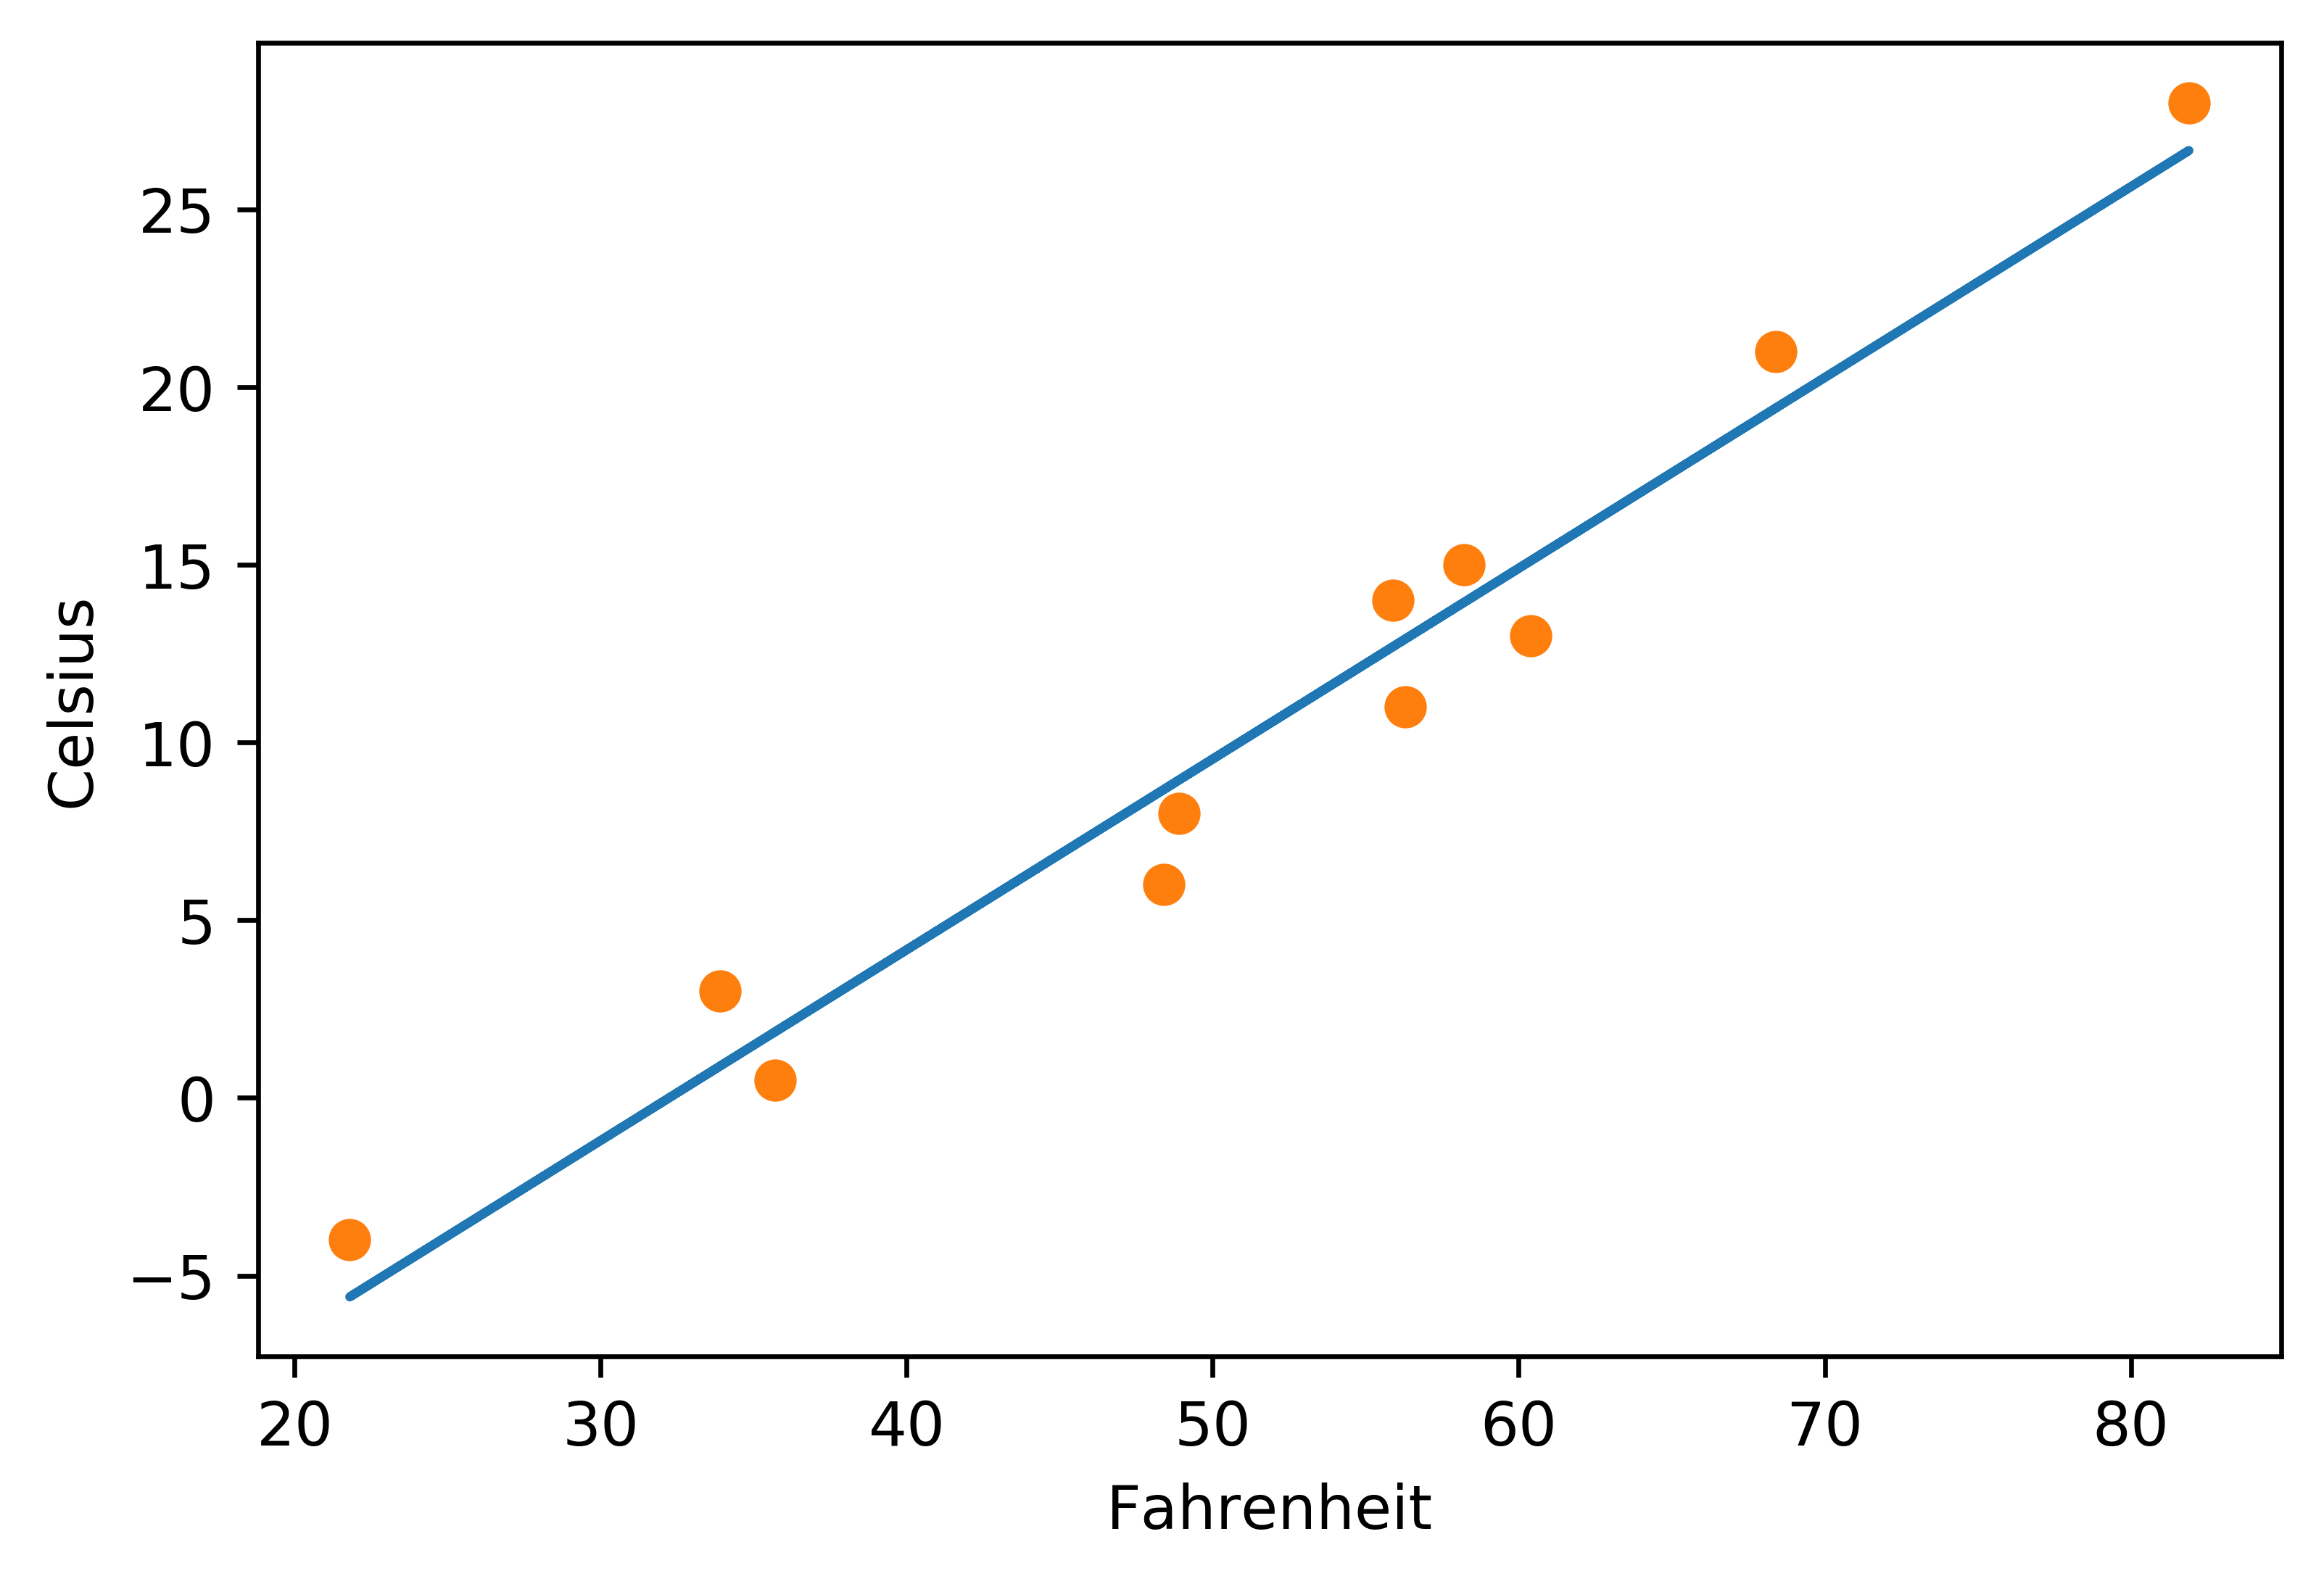

In [35]:

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

In [36]:
#Now Implement Autograd
def model(t_u, w, b):
    return w*t_u +b

def loss_fun(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [37]:
#We mark requires_grad to be true so the tensor remembers where it came from
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [38]:
#Tensors have a grad attribut
params.grad is None

True

In [41]:
#Call .backward() for backpropogration and then call the grad attribute
#the grad attribute contains the derivatives of the loss with respect to each element!
loss = loss_fun(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([13551.8906,   247.8000])

In [42]:
#Note: Call .backward() will lead derivative to accumulate at leaf nodes 
#You need to zero the gradient explicity after using it for parameter updates
#Zero by using params.grad.zero_() the trainling _ means inplace

if params.grad is not None:
    params.grad.zero_()

In [43]:
#Redifine Training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [44]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [46]:
%%HTML
<h3> Optimizers </h3>

In [47]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [48]:
#Try out Stochastic Gradient Descent SGD optimizer 
params = torch.tensor([1.0, 0.0], requires_grad =True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate)

In [49]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
#The value of params is updated when calling step
optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [50]:
#Remember to zero the gradient before you test or retest anything
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
#Zero grad
optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [51]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [52]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)


Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [53]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

Epoch 500, Loss 7.612903
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928578
Epoch 2000, Loss 2.927646


tensor([  0.5367, -17.3021], requires_grad=True)

In [54]:
%%HTML
<h3> Train Test split </h3>

In [59]:
#Here we will do a train test split by randomizing the t_u and t_c tensors and findinf the permutations of their indicies
#Use torch.randomperm to take permutations
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([3, 8, 0, 1, 9, 7, 4, 6, 2]), tensor([ 5, 10]))

In [61]:
#Create train and val t_u and t_c

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [67]:
#Run training loop to evaluate val loss at each epoch
#compare training and validation loop. Are they diverging or converging?
#Divergint losses means overfitting

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs +1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fun(val_t_p, val_t_c)
        
        #Zero the grad
        optimizer.zero_grad()
        #backpropogration on loss function
        train_loss.backward()
        #Step
        optimizer.step()
        
        if epoch <=3 or epoch % 500 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'. format(
            epoch, float(train_loss), float(val_loss)))
                  
    return params
                
        

In [68]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 74.87001037597656, Validation loss 105.08885192871094
Epoch 2, Training loss 39.48740005493164, Validation loss 43.16947555541992
Epoch 3, Training loss 33.14882278442383, Validation loss 27.89400863647461
Epoch 500, Training loss 7.320817947387695, Validation loss 7.02027702331543
Epoch 1000, Training loss 3.752513885498047, Validation loss 3.671329975128174
Epoch 1500, Training loss 3.239682674407959, Validation loss 2.6833066940307617
Epoch 2000, Training loss 3.1659791469573975, Validation loss 2.3491995334625244
Epoch 2500, Training loss 3.155386209487915, Validation loss 2.2283644676208496
Epoch 3000, Training loss 3.153865098953247, Validation loss 2.183397054672241


tensor([  5.2396, -16.7274], requires_grad=True)

In [69]:
#The training loss and validation loss are converging!
#this means the model is not overfitting
#We'll also note that it is common for the model to perform better on training set than validation set because
#the parameters are set by the trating set data


In [70]:
#Note make sure to call .backward on the train loss funciton and not the val loss function
#the val loss function is only ther for evaluation purposes


In [75]:
#We can disable autograd on a torch tensor by calling torch.no_grad
#this may improve performance on larger models
#Implement into trainging loop

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    '''
    Training_loop: traing loop for model
    Input: 
        n_epochs: total number of training loops
        optimizer: optimizer initiated earlier
        params: params for model
        train_t_u: training unknown data
        val_t_u: validation unkown data 
        train_t_c: training Celsuis
        val_t_c:validation celsius
    
    '''
    for epoch in range(1, n_epochs +1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        #Implement no_grad for validation
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        
        #Zero grad
        optmizer.zero_grad()
        #backpropogation on training loss
        train_loss.backward()
        #step
        optimizer.step()
        
        if epoch <=3 or epoch % 500 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'. format(
            epoch, float(train_loss), float(val_loss)))
                  
    return params

In [76]:
#Now we can implement a calc forward  funciton that will do forward propograion and can selectivly have autograd
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train_):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

In [77]:
%%HTML
<h3> Exercises </h3>


In [83]:
#Define second model
def model2(t_u, w1, w2, b):
    '''
    Input:
        t_u: tensor of unknown temperatures
        w1: weights 1
        w2: weights 2
        b: y-intercept
    Output:
        yPred: y predicted values
    '''
    return w2* t_u **2 + w1 * t_u +b

In [90]:
#define training loop for model 2
def trainingLoop2(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs +1):
        train_t_p = model2(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
    
        with torch.no_grad():
            val_t_p = model2(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
    
        #Zero grad 
        optimizer.zero_grad()
        #backprop on tain loss
        train_loss.backward()
        #Step 
        optimizer.step()
        
        if epoch <=3 or epoch % 500 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'. format(
            epoch, float(train_loss), float(val_loss)))
                  
    return params
    
    
        

In [94]:
params = torch.tensor([1.0, 0.5, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

trainingLoop2(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 94.34403991699219, Validation loss 81.74862670898438
Epoch 2, Training loss 90.86084747314453, Validation loss 77.92604064941406
Epoch 3, Training loss 87.53174591064453, Validation loss 74.28532409667969
Epoch 500, Training loss 15.21440601348877, Validation loss 8.090587615966797
Epoch 1000, Training loss 14.79478931427002, Validation loss 7.890987396240234
Epoch 1500, Training loss 14.39073657989502, Validation loss 7.6982421875
Epoch 2000, Training loss 14.001675605773926, Validation loss 7.512445449829102
Epoch 2500, Training loss 13.62704849243164, Validation loss 7.333320617675781
Epoch 3000, Training loss 13.266322135925293, Validation loss 7.160652160644531


tensor([ 0.7179,  0.2784, -0.1145], requires_grad=True)

In [95]:
%%HTML
<h3>NeuaralNet Linear Regression </h3>

In [96]:
import torch.nn as nn

In [99]:
linear_model= nn.Linear(1,1)
linear_model(val_t_un)

RuntimeError: size mismatch, m1: [1 x 2], m2: [1 x 1] at C:\w\b\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:41